In [7]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

x = data.data
y = data.target

print(x.shape)
print(data.feature_names)
print(data.target_names)

(569, 30)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [8]:
df = pd.DataFrame(x, columns=data.feature_names)
df['target'] = y
print(df.isnull().sum())
print(df.duplicated().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64
0


In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

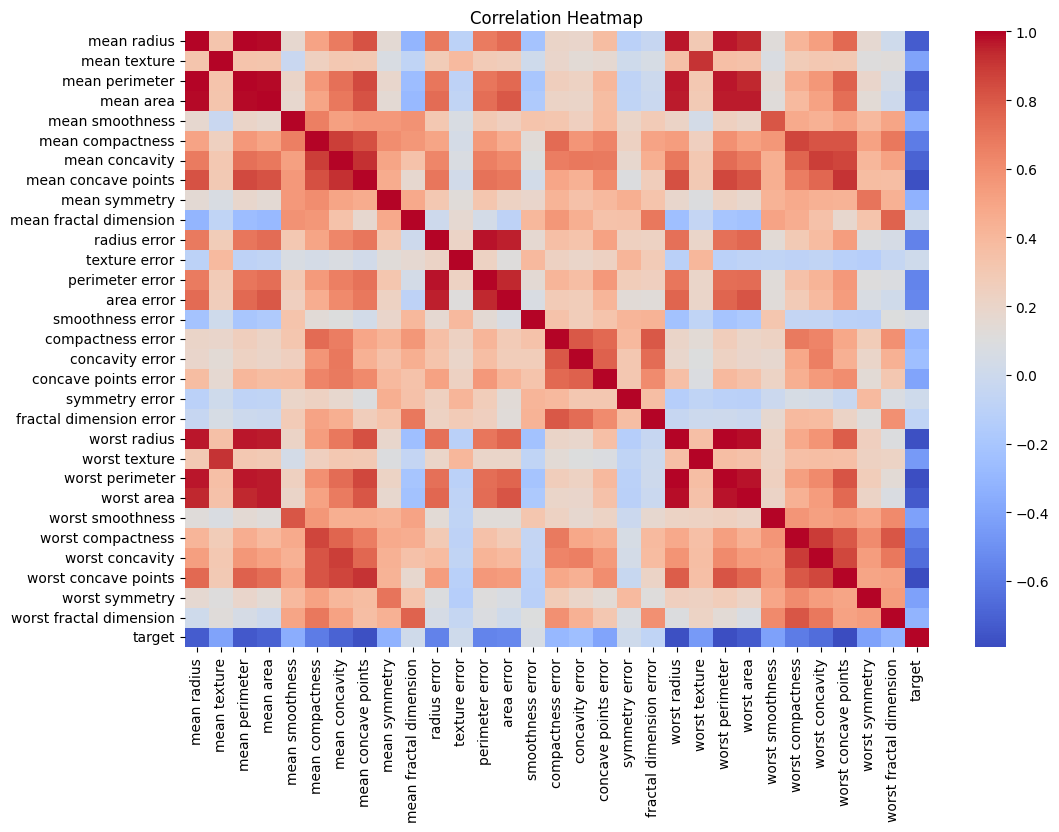

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [16]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
reg.fit(x_train, y_train)

y_pred = reg.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

acc = accuracy_score(y_test, y_pred) 
print(acc)

cr = classification_report(y_test, y_pred)
print(cr)

cm = confusion_matrix(y_test, y_pred)
print(cm)

0.9736842105263158
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

[[41  2]
 [ 1 70]]


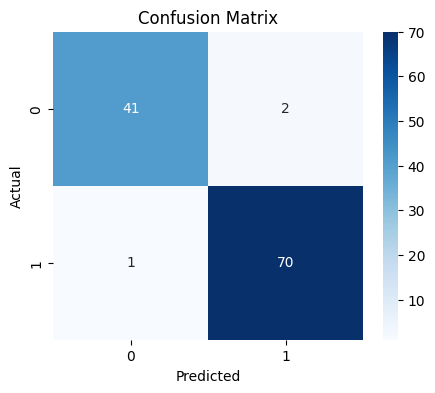

In [22]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# my own code for comparision

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X = data.data
y = data.target

print("Shape:", X.shape)
print("Features:", data.feature_names[:5])
print("Target meaning:", data.target_names)

Shape: (569, 30)
Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness']
Target meaning: ['malignant' 'benign']


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [27]:
def compute_loss(y, p):
    n = len(y)
    epsilon = 1e-9   # avoid log(0)
    return -(1/n)*np.sum(y*np.log(p+epsilon) + (1-y)*np.log(1-p+epsilon))

In [28]:
def train_logistic(X, y, lr=0.01, epochs=1000):
    
    n_samples, n_features = X.shape
    
    W = np.zeros(n_features)
    b = 0
    
    losses = []
    
    for epoch in range(epochs):
        
        z = X @ W + b
        p = sigmoid(z)
        
        loss = compute_loss(y, p)
        losses.append(loss)
        
        # gradients
        dw = (1/n_samples) * (X.T @ (p - y))
        db = (1/n_samples) * np.sum(p - y)
        
        # update
        W -= lr * dw
        b -= lr * db
        
        if epoch % 100 == 0:
            print(f"Epoch {epoch} loss {loss:.4f}")
    
    return W, b, losses

In [29]:
W, b, losses = train_logistic(X_train, y_train, lr=0.01, epochs=1000)

Epoch 0 loss 0.6931
Epoch 100 loss 0.2543
Epoch 200 loss 0.1917
Epoch 300 loss 0.1633
Epoch 400 loss 0.1465
Epoch 500 loss 0.1350
Epoch 600 loss 0.1267
Epoch 700 loss 0.1202
Epoch 800 loss 0.1150
Epoch 900 loss 0.1107


In [30]:
def predict(X, W, b):
    probs = sigmoid(X @ W + b)
    return (probs >= 0.5).astype(int)

In [32]:
my_pred = predict(X_test, W, b)

accuracy = np.mean(y_pred == y_test)
print("Scratch Model Accuracy:", accuracy)

Scratch Model Accuracy: 0.9824561403508771


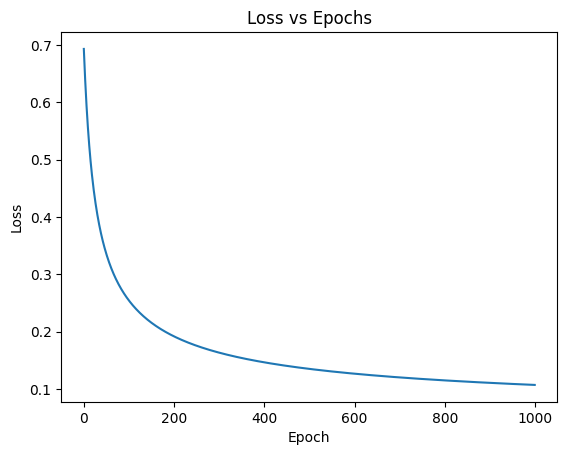

In [33]:
plt.plot(losses)
plt.title("Loss vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()